'Pi'

3.141592653589793

-3141592.6536064446

array([1.00000000e+00, 1.55854546e+27])

array([-3.94784176e+13, -6.15289084e+40])

3.141592653589793

'Checkpoint'

'Mode frequency'

1413716694116239.5

(1.4380853650881218e+17+5.322257310030809e+16j)

'Mode freq'

(-2597826.1855162806-4716155324057822j)

'Spatial func'

(-0-5.457493988010165e-10j)

(-1.1635041728682452e-09, 3.12955267446522e-09)

C:\Users\19253\AppData\Local\Temp\ipykernel_2064\2259534692.py:111: RuntimeWarning: invalid value encountered in cdouble_scalars
  wder=wq/2*(termm+termp)/(term)
C:\Users\19253\AppData\Local\Temp\ipykernel_2064\2259534692.py:114: RuntimeWarning: invalid value encountered in cdouble_scalars
  return 1/N0*term/np.sqrt(np.abs(wder))


(nan+nanj)

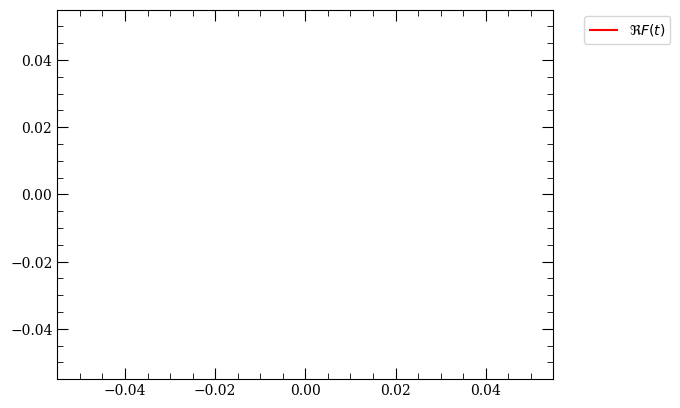

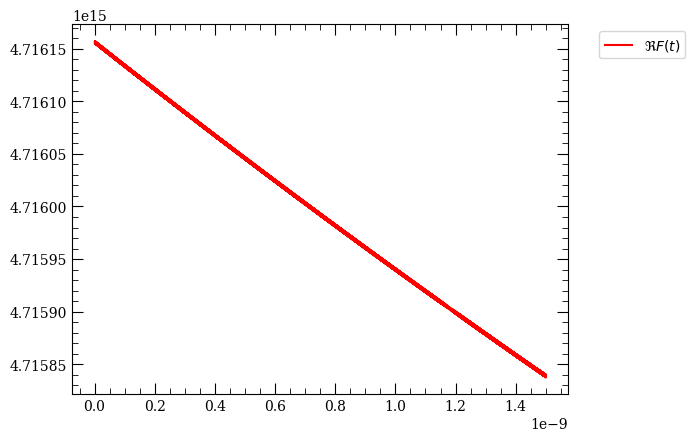

In [41]:
#### %matplotlib inline
'''Module Import'''
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np
import scipy as sp
# Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output
import arc
from arc import *
from sympy import*
import sympy as sym
import scipy.linalg as ling
import numpy.linalg as nling
from sympy.physics.quantum import TensorProduct as tens
from sympy import Matrix
import itertools
from itertools import combinations
from qutip import *
import pandas as pd
from IPython.display import display, Math, Latex
import mpmath as mpmath

import scipy.integrate as integrate
import scipy.special as special
from scipy import interpolate
import itertools as iter
import csv


'''Constants'''
#Use Natural Units
Tn=(1.0/1.228)*1.0E-9 #in ps
Ln=3.862E-4 #(in nm)
qe=3.302 #e/C Coulomb
eps0=1 #Free Space Permittivity
hbar=1 #Reduced Planck's constant
c=1 #Speed of Light
e=3.302 #Charge
a_0=0.72978E-2 #in Bohr radius
ea_0 = 2.4097E-2 #in Debye

'''Transition Rates'''

###############################
#Tensor space |A1>|A2>|A3>|C1>|C2>|C3>
#H_Ai = sigmaz*(-w_i/2)
#H_AiAj = V_ij(|2><|2|)_(Ai).(|2><|2|)_(Aj)
#H_Ci= w_ci(t)(p(t)u(r)*a_i+p(x,t)^*u(r,t)^**a_i^+)^2
#H_AiCj = sum_[e_vec]d3r [psi_1^*(r)psi_2(r)+H.c][(r_vec*e_vec)(p(x,t)*u(r,t).e_vec)*a_i+H.c]
#U_I(r,t)=exp(-i(sum_[i] dt H_Ai+H_Ci))
#H_I(t)= sum_[i,j] U^+(H_AiAj+H_AiCj)U

#Maximum photon number state in Fock basis
nc=2
display('Pi')
display(np.pi)
#System, Field, Charge parameters. Dictionary used to store values for convenience
argz = {'Rabi': 4.5E-2*2.0*np.pi, 't_c': 1.0/4.0*1.0E0, 'w1': 15000000000*2.0*np.pi, 'V12': 1.0E-6*2.0*np.pi,
        'V13': 1.0E-6, 'ny': 1, 'nz': 1, 'nx':1, 'Lx': 1.0E-5, 'Ly': 1.0E-6, 'Lz': 1.0E-6, 'vc': 0.000001, 'xpos': 0.0, 'mu_z': 1.0, 'mu_y': 1.0}

kxi=2*np.pi*argz['nx']/np.log((1-argz['vc'])/(1+argz['vc']))
display(kxi)
nlimits=1
Anlist=np.array([1.0])
Bnlist=np.array([(-(4*kxi**2+(1)**2))])
for kzz in np.arange(1,nlimits+1,1):
    #display(kzz)
    termA=1.0
    termB=1.0    
    for j in np.arange(0,2*kzz,1):
        termA= termA*(-(4*kxi**2+(2*j+1)**2))
        #display(j)
        termB= termB*(-(4*kxi**2+(2*j+1)**2))    
    #display(termA)
    termB=termB*(-(4*kxi**2+(4*kzz+1)**2))
    Anlist=np.append(Anlist,termA)
    Bnlist=np.append(Bnlist,termB)
display(Anlist)
display(Bnlist)



def Jnbase(tau,xx,mode,args):
    nx,ny,nz=mode
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    Dpl=np.log((1-vc)/(1+vc))
    kxi=2.0*nx*np.pi/(Dpl) # wavenumber k3 multiplied by cT to give dimensionless wavenumber for xi
    kxix=2.0j*nx*np.pi/(Dpl)
    kxip=2.0j*nx*np.pi/(Dpl)-1
    kxim=2.0j*nx*np.pi/(Dpl)+1
    wk=2.0*nx*np.pi/((1)*Dpl) #wk is a dimensional wavenumber for conformally mapped variable eta=log(tau/Tn) where Tn is a time scale
    wq=(3.0E8)*np.pi*np.sqrt((ny/Ly)**2+(nz/Lz)**2)
    c1=1
    tau0=np.sqrt((Lx/vc)**2-xx**2)
    gm0=np.arcsinh(kxi/(wq*tau0))+1.0j*np.pi/2.0
    gm=np.arcsinh(kxi/(wq*tau))+1.0j*np.pi/2.0
    gmp=np.arccosh(kxip/(wq*tau))
    gmm=np.arccosh(kxim/(wq*tau))
    tgm0=-1.0+2.0/(1+1/(np.sqrt(gm0**2-1.0+0.0j)+gm0)**2)
    tgm=-1.0+2.0/(1+1/(np.sqrt(gm**2-1.0+0.0j)+gm)**2)
    tgmm=-1.0+2.0/(1+1/(np.sqrt(gmp**2-1.0+0.0j)+gmp)**2)
    tgmp=-1.0+2.0/(1+1/(np.sqrt(gmm**2-1.0+0.0j)+gmm)**2)
    term=np.exp(-kxix*(tgm-gm+1.0j*np.pi/2)+1.0j*np.pi/4)/(2*np.sqrt(-1.0j/2*tgm))
    N0=np.exp(-kxix*(tgm0-gm0+1.0j*np.pi/2)+1.0j*np.pi/4)/(2*np.sqrt(-1.0j/2*tgm0))
    termp=np.exp(-kxip*(tgmp-gmp+1.0j*np.pi)-kxix*1.0j*np.pi/2+1.0j*np.pi/4)/(2*np.sqrt(-1.0j/2*tgmp))
    termm=np.exp(-kxim*(tgmm-gmm+1.0j*np.pi)-kxix*1.0j*np.pi/2+1.0j*np.pi/4)/(2*np.sqrt(-1.0j/2*tgmm))
    wder=wq/2*(termm+termp)/(term)
   
    
    return 1/N0*term/np.sqrt(np.abs(wder))

def Jnder(tau,xx,mode,args):
    nx,ny,nz=mode
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    Dpl=np.log((1-vc)/(1+vc))
    ke=2.0*nx*np.pi/((3.0E8)*Dpl)
    kxi=2.0*nx*np.pi/(Dpl) # wavenumber k3 multiplied by cT to give dimensionless wavenumber for xi
    kxix=2.0j*nx*np.pi/(Dpl)
    kxip=2.0j*nx*np.pi/(Dpl)-1
    kxim=2.0j*nx*np.pi/(Dpl)+1
    wk=2.0*nx*np.pi/((1)*Dpl) #wk is a dimensional wavenumber for conformally mapped variable eta=log(tau/Tn) where Tn is a time scale
    wq=(3.0E8)*np.pi*np.sqrt((ny/Ly)**2+(nz/Lz)**2)
    c1=1
    tau0=np.sqrt((Lx/(vc*3.0E8))**2-(xx/3.0E8)**2)
    gm0=np.arcsinh(kxi/(wq*tau0))+1.0j*np.pi/2.0
    gm=np.arcsinh(kxi/(wq*tau))+1.0j*np.pi/2.0
    gmp=np.arccosh(kxip/(wq*tau))
    gmm=np.arccosh(kxim/(wq*tau))
    tgm0=-1.0+2.0/(1+1/(np.sqrt(gm0**2-1.0+0.0j)+gm0)**2)
    tgm=-1.0+2.0/(1+1/(np.sqrt(gm**2-1.0+0.0j)+gm)**2)
    tgmm=-1.0+2.0/(1+1/(np.sqrt(gmp**2-1.0+0.0j)+gmp)**2)
    tgmp=-1.0+2.0/(1+1/(np.sqrt(gmm**2-1.0+0.0j)+gmm)**2)
    term=np.exp(-kxix*(tgm-gm+1.0j*np.pi/2)+1.0j*np.pi/4)/(2*np.sqrt(-1.0j/2*tgm))
    N0=np.exp(-kxix*(tgm0-gm0+1.0j*np.pi/2)+1.0j*np.pi/4)/(2*np.sqrt(-1.0j/2*tgm0))
    termp=np.exp(-kxip*(tgmp-gmp+1.0j*np.pi)-kxix*1.0j*np.pi/2+1.0j*np.pi/4)/(2*np.sqrt(-1.0j/2*tgmp))
    termm=np.exp(-kxim*(tgmm-gmm+1.0j*np.pi)-kxix*1.0j*np.pi/2+1.0j*np.pi/4)/(2*np.sqrt(-1.0j/2*tgmm))
    
    
    
    return -1j*np.sqrt(np.abs(wder))/N0*term
pii=np.pi
display(pii)
def modefreq(tau,xx,mode,args):
    nx,ny,nz=mode
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    
    #Dpl=np.log((1-vc)/(1+vc))
    Dpl=np.abs(np.log((1-vc)/(1+vc)))
    ke=2.0*nx*pii/((3.0E8)*Dpl)
    kxi=2.0*nx*pii/(Dpl) # wavenumber k3 multiplied by cT to give dimensionless wavenumber for xi
    kxix=2.0j*nx*pii/(Dpl)
    kxip=2.0j*nx*pii/(Dpl)-1
    kxim=2.0j*nx*pii/(Dpl)+1
    wk=2.0*nx*pii/((1)*Dpl) #wk is a dimensional wavenumber for conformally mapped variable eta=log(tau/Tn) where Tn is a time scale
    wq=(3.0E8)*pii*np.sqrt((ny/Ly)**2+(nz/Lz)**2)
    c1=1
    tau0=np.sqrt((Lx/(vc*3.0E8))**2-(xx/3.0E8)**2)
    gm0=np.arcsinh(kxi/(wq*tau0))+1.0j*pii/2.0
    gm=np.arcsinh(kxi/(wq*tau))+1.0j*pii/2.0
    gmp=np.arccosh(kxip/(wq*tau))
    gmm=np.arccosh(kxim/(wq*tau))
    #tgm0=-1.0+2.0/(1+1/(np.sqrt(gm0**2-1.0+0.0j)+gm0)**2)
    #tgm=-1.0+2.0/(1+1/(np.sqrt(gm**2-1.0+0.0j)+gm)**2)
    tgm0=np.tanh(gm0)
    tgm=np.tanh(gm)
    tgmm=np.tanh(gmm)
    tgmp=np.tanh(gmp)
    term=np.exp(-kxix*(tgm-gm+1.0j*pii/2)+1.0j*pii/4)/(2*np.sqrt(-1.0j/2*tgm))
    N0=np.exp(-kxix*(tgm0-gm0+1.0j*pii/2)+1.0j*pii/4)/(2*np.sqrt(-1.0j/2*tgm0))
    termp=np.exp(-kxip*(tgmp-gmp+2.0j*pii/2)+1.0*kxix*1.0j*pii/2+1.0j*pii/4)/(2*np.sqrt(-1.0j/2*pii*kxip*tgmp))*np.sqrt(pii*kxix)
    termm=np.exp(-kxim*(tgmm-gmm+2.0j*pii/2)+1.0*kxix*1.0j*pii/2+1.0j*pii/4)/(2*np.sqrt(-1.0j/2*pii*kxim*tgmm))*np.sqrt(pii*kxix)
    wder=wq/2*(termm-termp)/(term)
   
    return wder

def intmodefreq(tau,xx,mode,args):
    nx,ny,nz=mode
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    Dpl=np.log((1-vc)/(1+vc))
    ke=2.0*nx*np.pi/((3.0E8)*Dpl)
    wk=2.0*nx*np.pi/((1)*Dpl)
    wq=(3.0E8)*np.pi*np.sqrt((ny/Ly)**2+(nz/Lz)**2)
    c1=1
    tau0=np.sqrt((Lx/vc)**2-xx**2)
    wder=wq*(1+1j/(2*wq*tau)-5*(4*wk**2+1)/(16*(wq*tau)**2)+7j*(4*wk**2+9)*(4*wk**2+1)/(256*(wq*tau)**3))
    wderint=np.abs(wq*(tau-tau0+1j/(2*wq)*(np.log(tau/tau0))+5*(4*wk**2+1)/(16*(wq)**2)*(1/tau-1/tau0)-\
               7j*(4*wk**2+9)*(4*wk**2+1)/(128*(wq)**3)*(1/tau**2-1/tau0**2)))
    return wderint


display('Checkpoint')


def Jnperbase(tau,xx,mode,args):
    nx,ny,nz=mode
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    Dpl=np.log((1-vc)/(1+vc))
    k=2.0*nx*np.pi/(3.0E8*Dpl)
    q=np.pi*np.sqrt((ny/Ly)**2+(nz/Lz)**2)
    c1=1.0
    tau0=np.sqrt((Lx/vc)**2-xx**2)
    eps=(k/q)**2
    Nrm=special.hankel1(0,q*tau0)
    o0t=c1*special.hankel1(0,q*tau)
    o1t1=integrate.quad(lambda s: c1*special.j0(q*s)**2/s,tau0,tau,points=np.linspace(tau0,tau,100),limit=500)[0]
    o1t2=integrate.quad(lambda s: c1*special.y0(q*s)**2/s,tau0,tau,points=np.linspace(tau0,tau,100),limit=500)[0]
    o1t3=integrate.quad(lambda s: c1*special.j0(q*s)*special.y0(q*s)/s,tau0,tau,points=np.linspace(tau0,tau,500),limit=4000)[0] 
    term=c1*o0t/Nrm+np.pi*eps/2*(np.real(o0t)*(o1t2+1.0j*o1t3)-np.imag(o0t)*(o1t1+1.0j*o1t3))
    
    return term

def Jnperder(tau,xx,mode,args):
    nx,ny,nz=mode
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    Dpl=np.log((1-vc)/(1+vc))
    k=2.0*nx*np.pi/(3.0E8*Dpl)
    q=np.pi*np.sqrt((ny/Ly)**2+(nz/Lz)**2)
    c1=1.0
    tau0=np.sqrt((Lx/vc)**2-xx**2)
    eps=(k/q)**2
    Nrm=special.hankel1(0,q*tau0)
    o0t0=special.hankel1(0,q*tau)
    o0t=-q*c1*special.hankel1(1,q*tau)
    o1t1=integrate.quad(lambda s: c1*special.j0(q*s)**2/s,tau0,tau,points=np.linspace(tau0,tau,100),limit=500)[0]
    o1t2=integrate.quad(lambda s: c1*special.y0(q*s)**2/s,tau0,tau,points=np.linspace(tau0,tau,100),limit=500)[0] 
    o1t3=integrate.quad(lambda s: c1*special.j0(q*s)*special.y0(q*s)/s,tau0,tau,points=np.linspace(tau0,tau,500),limit=1000)[0] 
    term=c1*o0t/Nrm+np.pi*eps/2*(np.real(o0t)*(o1t2+1.0j*o1t3)-np.imag(o0t)*(o1t1+1.0j*o1t3)+\
            np.real(o0t0)*(np.imag(o0t0)**2+1.0j*np.imag(o0t0)*np.real(o0t0))/tau-\
             np.imag(o0t0)*(np.real(o0t0)**2/tau+1.0j*np.imag(o0t0)*np.real(o0t0))/tau)
    
    return term
 

def timefun(tau,xx,args,mode):
    nx,ny,nz=mode
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    Dpl=np.log((1-vc)/(1+vc))
    #k=2.0*nx*np.pi/((3.0E8)*Dpl)
    wk=2.0*nx*np.pi/((1)*Dpl)
    wq=(3.0E8)*np.pi*np.sqrt((ny/Ly)**2+(nz/Lz)**2)
    c1=1
    tau0=np.sqrt((Lx/vc)**2-(xx/3.0E8)**2)
    term=np.exp(-1j*wq*tau)/np.sqrt(wq*tau)*(1-1j*(4*wk**2+1)/(8*(wq*tau))+(4*wk**2+9)*(4*wk**2+1)/(128*(wq*tau)**2))
    N0=np.exp(-1j*wq*tau0)/np.sqrt(wq*tau0)*(1-1j*(4*wk**2+1)/(8*(wq*tau0))+(4*wk**2+9)*(4*wk**2+1)/(128*(wq*tau0)**2))
    term0=(1+1j*(4*wk**2+1)/(8*(wq*tau))-(4*wk**2+9)*(4*wk**2+1)/(128*(wq*tau)**2))
    #Need to find cosh sinh v-+1 terms
    termm1=(1+1j*(4*(wk+1j)**2+1)/(8*(wq*tau))-(4*(wk+1j)**2+9)*(4*(wk+1j)**2+1)/(128*(wq*tau)**2))
    #N0m1=np.exp(-1j*wq*tau0)/np.sqrt(wq*tau0)*(1+1j*(4*(wk+1j)**2+1)/(8*(wq*tau0))-(4*(wk+1j)**2+9)*(4*(wk+1j)**2+1)/(128*(wq*tau0)**2))
    termp1=(1+1j*(4*(wk-1j)**2+1)/(8*(wq*tau))-(4*(wk-1j)**2+9)*(4*(wk-1j)**2+1)/(128*(wq*tau)**2))
    #N0p1=np.exp(-1j*wq*tau0)/np.sqrt(wq*tau0)*(1+1j*(4*(wk-1j)**2+1)/(8*(wq*tau0))-(4*(wk-1j)**2+9)*(4*(wk-1j)**2+1)/(128*(wq*tau0)**2))
    N0=np.exp(-1j*wq*tau0)/np.sqrt(wq*tau0)*(1+1j*(4*wk**2+1)/(8*(wq*tau0))-(4*wk**2+9)*(4*wk**2+1)/(128*(wq*tau0)**2))
    wder=wq/2*(termm1+termp1)/(term0)
    
    
    
    return -1j*np.sqrt(np.abs(wder))/N0*term

'''
def timefun(tau,xx,args,narray):
    nx,ny,nz =narray
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    Dpl=np.abs(np.log((1-vc)/(1+vc)))
    k=2.0*nx*np.pi/Dpl
    q=np.pi*np.sqrt((ny/Ly)**2+(nz/Lz)**2)
    c1=1
    tau0=np.sqrt((Lx/vc)**2-xx**2)
    eps=(k/q)**2
    kx=Dpl*tau0/Lx*k
    
    Jnx=Jnperbase(tau,xx,narray,args)
    Jnd=Jnperder(tau,xx,narray,args)
    Jnd0=Jnperder(tau0,xx,narray,args)
    
    term=(Jnx)*np.sqrt(np.abs(Jnd/Jnx)/2.0)
    
    return term
'''
mode=1    
def spatialfun1(tau,x,y,z,narray,args):
    nx,ny,nz =narray
    Ly = args['Ly']
    Lz = args['Lz']
    Lx = args['Lx']
    vc = args['vc']
    xpos=args['xpos']
    muz=args['mu_z']
    muy=args['mu_y']
    Dpl=np.abs(np.log((1-vc)/(1+vc)))
    qy=np.pi*(ny/Ly)
    qz=np.pi*(nz/Lz)
    q=np.sqrt(qy**2+qz**2)
    kxi=2.0*nx*np.pi/(Dpl)
    c1=1
    tau0=np.sqrt((Lx/vc)**2-x**2)
    
    kx=Dpl*tau0/Lx*kxi/(3.0E8)
    xi=0.5*np.log((x+np.sqrt(tau**2+x**2))/tau)
    
    if mode==1:
        termy=2**(3/2)/np.sqrt(Lz*Ly*Dpl)*np.sin(kxi*xi)*np.cos(qy*y)*np.sin(qz*z)
        termz=2**(3/2)/np.sqrt(Lz*Ly*Dpl)*np.sin(kxi*xi)*np.sin(qy*y)*np.cos(qz*z)
        term=1j/q**2*(muz*qz*termy-muy*qy*termz)
        
    return term
Ida=identity(2)
gop=Ida-num(2)
Idc=identity(nc)
a=destroy(nc)

HRyd=argz['V12']*(tensor(num(2),num(2),Ida,Idc,Idc,Idc)+tensor(Ida,num(2),num(2),Idc,Idc,Idc))+\
        argz['V13']*(tensor(num(2),Ida,num(2),Idc,Idc,Idc))

tau00=lambda x: np.sqrt((argz['Lx']/(3.0E8*argz['vc']))**2-(x/3.0E8)**2)

mode1=[2,5,0]
mode2=[2,2,0]
mode3=[2,2,1]
Dpl=np.abs(np.log((1-argz['vc'])/(1+argz['vc'])))
display('Mode frequency')
display(np.pi*3.0E8*np.sqrt(((1.0/Dpl)**2+(1.0/argz['Ly'])**2+(1.0/argz['Lz'])**2)))




#Center atom terms

interm01= lambda taux, args : 1.0E9*spatialfun1(taux+tau00(args['Lx']/2),args['Lx']/2,args['Ly']/2,args['Lz']/2,mode1,args)*timefun(taux+tau00(args['Lx']/2),args['Lx']/2,args,mode1)*\
                                np.exp(-1j*(intmodefreq(taux+tau00(args['Lx']/2),args['Lx']/2,mode1,args)-(argz['w1'])*(taux)))
interm0f1= lambda taux, args : 1.0E9*spatialfun1(taux+tau00(args['Lx']/2),args['Lx']/2,args['Ly']/2,args['Lz']/2,mode1,args)*timefun(taux+tau00(args['Lx']/2),args['Lx']/2,args,mode1)*\
                                np.exp(-1j*(-intmodefreq(taux+tau00(args['Lx']/2),args['Lx']/2,mode1,args)-(argz['w1'])*(taux)))

intermV121= lambda taux, args : 1.0E6*spatialfun1(taux+tau00(args['Lx']/2),args['Lx']/2,args['Ly']/2,args['Lz']/2,mode2,args)*timefun(taux+tau00(args['Lx']/2),args['Lx']/2,args,mode2)*\
                                np.exp(-1j*(intmodefreq(taux+tau00(args['Lx']/2),args['Lx']/2,mode2,args)-(argz['w1']+argz['V12'])*(taux)))
intermV12f1= lambda taux, args : 1.0E6*spatialfun1(taux+tau00(args['Lx']/2),args['Lx']/2,args['Ly']/2,args['Lx']/2,args['Lz']/2,mode2,args)*timefun(taux+tau00(args['Lx']/2),args['Lx']/2,args,mode2)*\
                                np.exp(-1j*(-intmodefreq(taux+tau00(args['Lx']/2),args['Lx']/2,mode2,args)-(argz['w1']+argz['V12'])*(taux)))
                                       
intermV131= lambda taux, args : 1.0E9*spatialfun1(taux+tau00(args['Lx']/2),args['Lx']/2,args['Ly']/2,args['Lz']/2,mode3,args)*timefun(taux+tau00(args['Lx']/2),args['Lx']/2,args,mode3)*\
                                np.exp(-1j*(intmodefreq(taux+tau00(args['Lx']/2),args['Lx']/2,mode3,args)-(argz['w1']+argz['V13'])*(taux)))
intermV13f1= lambda taux, args : 1.0*spatialfun1(taux+tau00(args['Lx']/2),args['Lx']/2,args['Ly']/2,args['Lz']/2,mode3,args)*timefun(taux+tau00(args['Lx']/2),args['Lx']/2,args,mode3)*\
                                np.exp(-1j*(-intmodefreq(taux+tau00(args['Lx']/2),args['Lx']/2,mode3,args)-(argz['w1']+argz['V13'])*(taux)))
                                       
#Left atom terms
interm02= lambda taux, args :   1.0E-20*spatialfun1(taux+tau00(args['Lx']/4),args['Lx']/4,args['Ly']/4,args['Lz']/4,mode1,args)*timefun(taux+tau00(args['Lx']/4),args['Lx']/4,args,mode1)*\
                                np.exp(-1j*(intmodefreq(taux+tau00(args['Lx']/4),args['Lx']/4,mode1,args)-(argz['w1'])*(taux)))
interm0f2= lambda taux, args : 1.0E9*spatialfun1(taux+tau00(args['Lx']/4),args['Lx']/4,args['Ly']/4,args['Lz']/4,mode1,args)*timefun(taux+tau00(args['Lx']/4),args['Lx']/4,args,mode1)*\
                                np.exp(-1j*(-intmodefreq(taux+tau00(args['Lx']/4),args['Lx']/4,mode1,args)-(argz['w1'])*(taux)))

intermV122= lambda taux, args : 1.0E9*spatialfun1(taux+tau00(args['Lx']/4),args['Lx']/4,args['Ly']/4,args['Lz']/4,mode2,args)*timefun(taux+tau00(args['Lx']/4),args['Lx']/4,args,mode2)*\
                                np.exp(-1j*(intmodefreq(taux+tau00(args['Lx']/4),args['Lx']/4,mode2,args)-(argz['w1']+argz['V12'])*(taux)))
intermV12f2= lambda taux, args : 1.0E9*spatialfun1(taux+tau00(args['Lx']/4),args['Lx']/4,args['Ly']/4,args['Lz']/4,mode2,args)*timefun(taux+tau00(args['Lx']/4),args['Lx']/4,args,mode2)*\
                                np.exp(-1j*(-intmodefreq(taux+tau00(args['Lx']/4),args['Lx']/4,mode2,args)-(argz['w1']+argz['V12'])*(taux)))
                                       
intermV132= lambda taux, args : 1.0E9*spatialfun1(taux+tau00(args['Lx']/4),args['Lx']/4,args['Ly']/4,args['Lz']/4,mode3,args)*timefun(taux+tau00(args['Lx']/4),args['Lx']/4,args,mode3)*\
                                np.exp(-1j*(intmodefreq(taux+tau00(args['Lx']/4),args['Lx']/4,mode3,args)-(argz['w1']+argz['V13'])*(taux)))
intermV13f2= lambda taux, args : 1.0E9*spatialfun1(taux+tau00(args['Lx']/4),args['Lx']/4,args['Ly']/4,args['Lz']/4,mode3,args)*timefun(taux+tau00(args['Lx']/4),args['Lx']/4,args,mode3)*\
                                np.exp(-1j*(-intmodefreq(taux+tau00(args['Lx']/4),args['Lx']/4,mode3,args)-(argz['w1']+argz['V13'])*(taux)))
                                       
#Right atom terms
interm03= lambda taux, args : 1.0E9*spatialfun1(taux+3*args['Lx']/4,3*args['Lx']/4,3*args['Ly']/4,3*args['Lz']/4,mode1,args)*timefun(taux+3*args['Lx']/4,3*args['Lz']/4,args,mode1)*\
                                np.exp(-1j*(intmodefreq(taux+3*args['Lx']/4,3*args['Lx']/4,mode1,args)-(argz['w1'])*(taux)))
interm0f3= lambda taux, args : 1.0E9*spatialfun1(taux3*args['Lx']/4,3*args['Lx']/4,3*args['Ly']/4,3*args['Lz']/4,mode1,args)*timefun(taux+3*args['Lx']/4,3*args['Lz']/4,args,mode1)*\
                                np.exp(-1j*(-intmodefreq(taux+3*args['Lx']/4,3*args['Lx']/4,mode1,args)-(argz['w1'])*(taux)))

intermV123= lambda taux, args : 1.0E9*spatialfun1(taux+3*args['Lx']/4,3*args['Lx']/4,3*args['Ly']/4,3*args['Lz']/4,mode2,args)*timefun(taux+3*args['Lx']/4,3*args['Lz']/4,args,mode2)*\
                                np.exp(-1j*(intmodefreq(taux+3*args['Lx']/4,3*args['Lx']/4,mode2,args)-(argz['w1']+argz['V12'])*(taux)))
intermV12f3= lambda taux, args : 1.0E9*spatialfun1(taux+3*args['Lx']/4,3*args['Lx']/4,3*args['Ly']/4,3*args['Lz']/4,mode2,args)*timefun(taux+3*args['Lx']/4,3*args['Lz']/4,args,mode2)*\
                                np.exp(-1j*(-intmodefreq(taux+3*args['Lx']/4,3*args['Lx']/4,mode2,args)-(argz['w1']+argz['V12'])*(taux)))
                                       
intermV133= lambda taux, args : 1.0E9*spatialfun1(taux+3*args['Lx']/4,3*args['Lx']/4,3*args['Ly']/4,3*args['Lz']/4,mode3,args)*timefun(taux+3*args['Lx']/4,3*args['Lz']/4,args,mode3)*\
                                np.exp(-1j*(intmodefreq(taux+3*args['Lx']/4,3*args['Lx']/4,mode3,args)-(argz['w1']+argz['V13'])*(taux)))
intermV13f3= lambda taux, args : 1.0E9*spatialfun1(taux+3*args['Lx']/4,3*args['Lx']/4,3*args['Ly']/4,3*args['Lz']/4,mode3,args)*timefun(taux+3*args['Lx']/4,3*args['Lz']/4,args,mode3)*\
                                np.exp(-1j*(-intmodefreq(taux+3*args['Lx']/4,3*args['Lx']/4,mode3,args)-(argz['w1']+argz['V13'])*(taux)))   
                                       

inter0=tensor(destroy(2),gop,gop,a,Idc,Idc)+tensor(gop,destroy(2),gop,a,Idc,Idc)+tensor(gop,gop,destroy(2),a,Idc,Idc)
inter0f=tensor(destroy(2),gop,gop,a.dag(),Idc,Idc)+tensor(gop,destroy(2),gop,a.dag(),Idc,Idc)+tensor(gop,gop,destroy(2),a,Idc,Idc)
interV12=tensor(destroy(2),num(2),gop,Idc,Idc,a)+tensor(num(2),destroy(2),gop,Idc,Idc,a)\
            +tensor(gop,destroy(2),num(2),Idc,Idc,a)+tensor(gop,num(2),destroy(2),Idc,Idc,a)
interV12f=tensor(destroy(2),num(2),gop,Idc,Idc,a.dag())+tensor(num(2),destroy(2),gop,Idc,Idc,a.dag())\
            +tensor(gop,destroy(2),num(2),Idc,Idc,a.dag())+tensor(gop,num(2),destroy(2),Idc,Idc,a.dag())
interV13=tensor(destroy(2),gop,num(2),Idc,a,Idc)+tensor(num(2),gop,destroy(2),Idc,a,Idc)
interV13f=tensor(destroy(2),gop,num(2),Idc,a.dag(),Idc)+tensor(num(2),gop,destroy(2),Idc,a.dag(),Idc)

#RWA Hamiltonian
Hint=[[tensor(destroy(2),gop,gop,a,Idc,Idc),interm01],[tensor(gop,destroy(2),gop,a,Idc,Idc),interm02],[tensor(gop,gop,destroy(2),a,Idc,Idc),interm03],\
     [tensor(destroy(2),num(2),gop,Idc,Idc,a),intermV121],[tensor(num(2),destroy(2),gop,Idc,Idc,a),intermV122],[tensor(gop,destroy(2),num(2),Idc,Idc,a),intermV122],\
     [tensor(gop,num(2),destroy(2),Idc,Idc,a),intermV123],[tensor(destroy(2),gop,num(2),Idc,a,Idc),intermV131],[tensor(num(2),gop,destroy(2),Idc,a,Idc),intermV133]]
display(interm0f2(100.0,argz))
display('Mode freq')
display(modefreq(tau00(argz['xpos']),argz['xpos'],mode1,argz))
display('Spatial func')
display(spatialfun1(20.0,argz['Lx']/2,0.005,0.005,mode1,argz))
display(integrate.quad(lambda x: interm02(x,argz), 0.0, 1.0E-12,limit=500))


intmodes=lambda taux,args: -np.imag(modefreq(taux+tau00(args['Lx']/4),args['Lx']/4,mode1,args))
Hint2=[]
for [x,f] in Hint:
    #display(x)
    #display(1)
    Hint2.append([x.dag(),lambda t, argz: np.conjugate(f(t,argz))])
    
Hint+=Hint2
Hint.append(HRyd)
display(Jnbase(tau00(argz['xpos']),argz['xpos'],[2,1,0],argz))


tlist=np.linspace(1E-12,1.5E-9,100000)

psiag=identity(2)-num(2)
psic0=basis(2,0)*basis(1,0).dag()
psi0=1/np.sqrt(3)*(tensor(basis(2,1),basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0))+\
       tensor(basis(2,1),basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0))+tensor(basis(2,1),basis(2,0),basis(2,1),basis(2,0),basis(2,0),basis(2,0)))

fig, ax = plt.subplots(1,1)

# Create multiple plots 
ax.plot(tlist , [np.imag(Jnbase(t+tau00(argz['Lx']/2),argz['Lx']/2,mode1,argz)) for t in tlist], 'r',label=r'$\Re F(t)$')

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

fig, ax = plt.subplots(1,1)

# Create multiple plots 
ax.plot(tlist , [(intmodes(t,argz)) for t in tlist], 'r',label=r'$\Re F(t)$')

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

op1=tensor(num(2),num(2),psiag,identity(2),identity(2),identity(2))
#output = mesolve(Hint, psi0, tlist, e_ops=[op1],args=argz)

#display(output.expect[0])


## 